In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('mysticdata.csv', sep=";")
df.tail(10)

,t,x,y,z
990,5.654867,203.93558,117.333860,114.862526
991,5.660579,182.16252,94.526520,147.186160
992,5.666291,180.44528,92.872190,170.497340
993,5.672003,165.19200,80.967090,190.134770
994,5.677715,173.61710,84.957140,163.823060
995,5.683427,206.24672,115.880165,111.264050
996,5.689139,175.49434,96.734146,176.997970
997,5.694851,162.17198,77.348060,185.075300
998,5.700563,155.18329,63.753395,206.437410
999,5.706275,206.49544,123.781296,113.543430


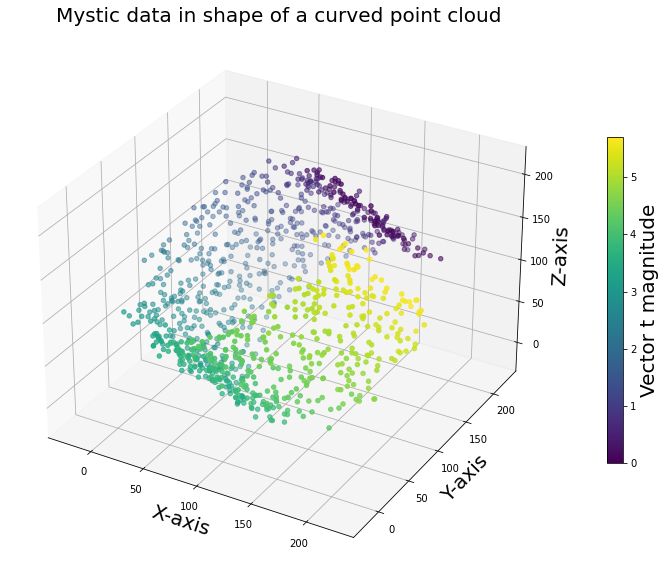

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# create sample data
x = df["x"].to_numpy()
y = df["y"].to_numpy()
z = df["z"].to_numpy()
t = df["t"].to_numpy()
# create 3D plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(x, y, z, c=t, cmap='viridis')

# add colorbar
colorbar = plt.colorbar(scatter, shrink=0.6)
colorbar.set_label("Vector t magnitude", fontsize=20)
# add grid lines on all axes
ax.grid(True)

ax.set_title("Mystic data in shape of a curved point cloud", fontsize=20)
# set axis labels
ax.set_xlabel('X-axis', fontsize=20)
ax.set_ylabel('Y-axis', fontsize=20)
ax.set_zlabel('Z-axis', fontsize=20)

# show plot
plt.show()

# Task 1a

Text(0.5, 1, 'Trellis plot of X,Y,Z with spectral scale T')

<Figure size 1440x1440 with 0 Axes>

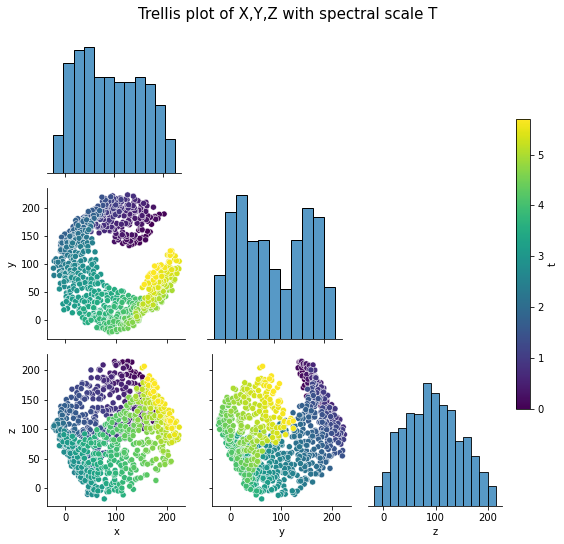

In [4]:
df = pd.DataFrame()

data = {'x': x, 'y': y, 'z': z, 't': t}
df = pd.DataFrame(data)

#fig, ax = plt.subplots(figsize=(1, 18))

# define minimum and maximum values for t
t_min = np.min(t)
t_max = np.max(t)

fig =  plt.figure(figsize=(20,20))

#cmap = sns.color_palette("Spectral", as_cmap=True)
g = sns.PairGrid(df, corner=True, hue="t", palette="viridis")
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, hue=None)
g.add_legend()
#pairplot = sns.pairplot(df, diag_kind="kde", hue="t", palette='viridis', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=t_min, vmax=t_max)
colorbar = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# #http://seaborn.pydata.org/generated/seaborn.plotting_context.html

g._legend.remove()

# # Draw the colorbar
cbar =  plt.colorbar(colorbar, ax=g.fig.axes, orientation='vertical', label='t', fraction=0.03, pad=0.00)
cbar.ax.tick_params(labelsize=10) 
g.fig.suptitle("Trellis plot of X,Y,Z with spectral scale T", fontsize=15, y=1) # y= some height>1

In [13]:
dataMatrix = np.vstack((x, y, z)).T

# Centering the data
#dataMatrix = dataMatrix - np.mean(dataMatrix, axis=0)

# Standardizing the data
#scaler = StandardScaler()
#dataMatrix = scaler.fit_transform(dataMatrix)

print(dataMatrix.shape)

(1000, 3)


# Task 1b

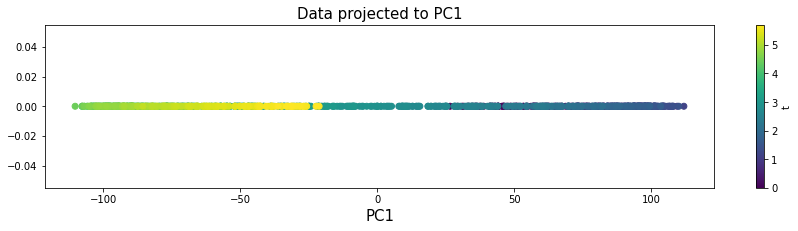

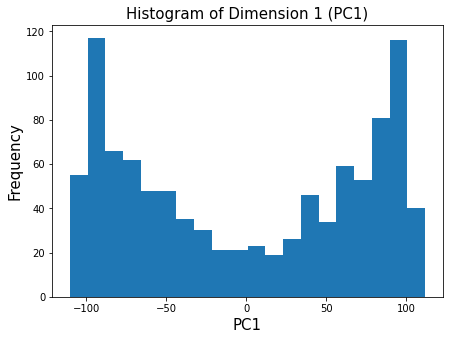

In [14]:
pca = PCA(n_components=1)
embedding = pca.fit_transform(dataMatrix)

plt.figure(figsize=(15,3))
# Plot the one-dimensional embedding
plt.scatter(embedding, np.zeros_like(embedding), c=t, cmap=cmap, alpha=1)

# Add the colorbar and set its label

plt.colorbar(colorbar, label='t')

# Add the axis labels and title
plt.xlabel('PC1',fontsize=15)
plt.title('Data projected to PC1',fontsize=15)

# Show the plot
plt.show()

plt.figure(figsize=(7,5))
# Plot the histogram of the one-dimensional embedding
plt.hist(embedding, bins=20)
plt.xlabel('PC1',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of Dimension 1 (PC1)',fontsize=15)
plt.show()

# Task 1c

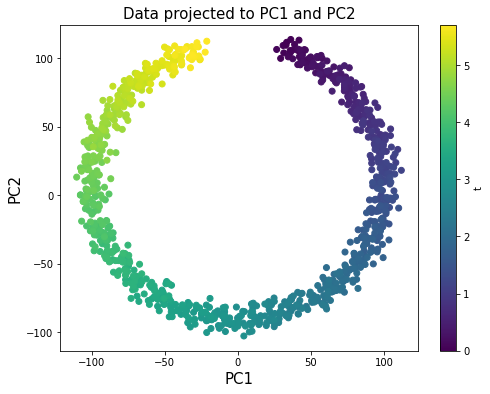

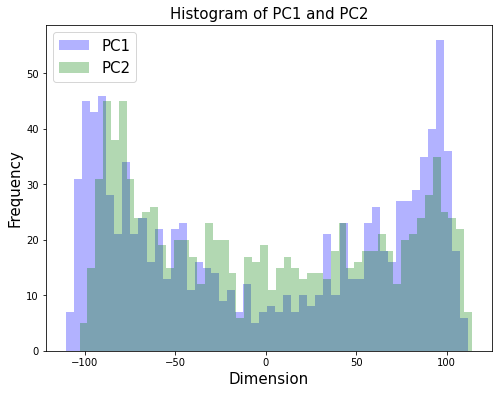

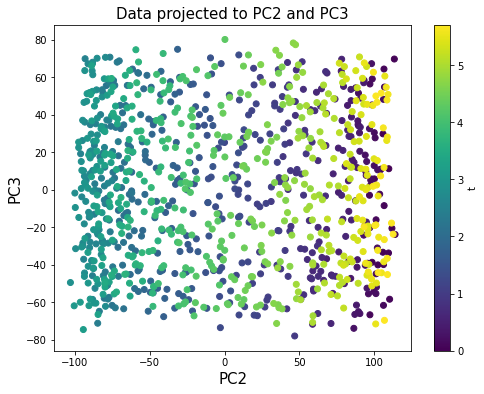

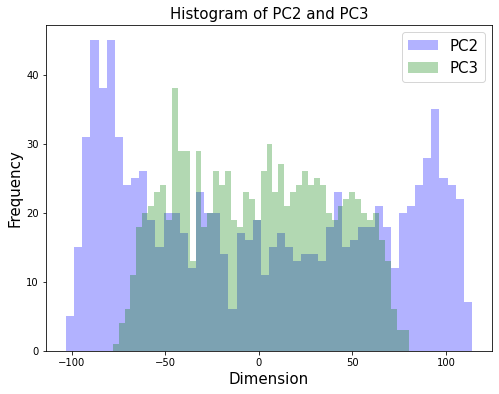

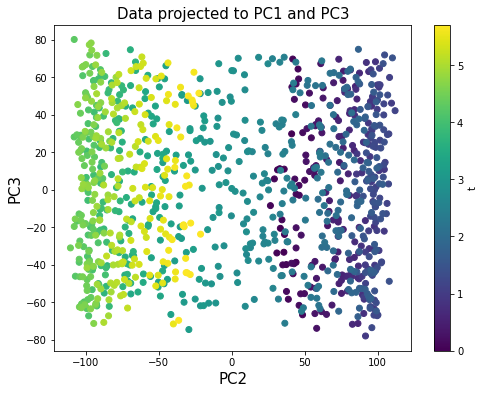

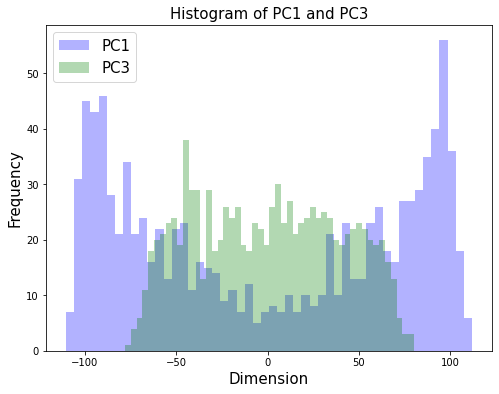

In [18]:
pca = PCA(n_components=3)
embedding = pca.fit_transform(dataMatrix)

plt.figure(figsize=(8,6))

# Plot the data projected to the first and second PCA components
plt.scatter(embedding[:,0], embedding[:,1], c=t, cmap=cmap, alpha=1)
plt.colorbar(colorbar, label='t')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title('Data projected to PC1 and PC2',fontsize=15)

plt.figure(figsize=(8, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='PC1')
plt.hist(embedding[:, 1], bins=50, alpha=0.3, color='green', label='PC2')
plt.xlabel('Dimension',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of PC1 and PC2',fontsize=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(8,6))
# Plot the data projected to the second and third PCA components
plt.scatter(embedding[:,1], embedding[:,2], c=t, cmap=cmap, alpha=1)
plt.colorbar(colorbar, label='t')
plt.xlabel('PC2',fontsize=15)
plt.ylabel('PC3',fontsize=15)
plt.title('Data projected to PC2 and PC3',fontsize=15)

plt.figure(figsize=(8, 6))
plt.hist(embedding[:, 1], bins=50, alpha=0.3, color='blue', label='PC2')
plt.hist(embedding[:, 2], bins=50, alpha=0.3, color='green', label='PC3')
plt.xlabel('Dimension',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of PC2 and PC3',fontsize=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(8,6))
# Plot the data projected to the first and third PCA components
plt.scatter(embedding[:,0], embedding[:,2], c=t, cmap=cmap, alpha=1)
plt.colorbar(colorbar, label='t')
plt.xlabel('PC2',fontsize=15)
plt.ylabel('PC3',fontsize=15)
plt.title('Data projected to PC1 and PC3',fontsize=15)

plt.figure(figsize=(8, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='PC1')
plt.hist(embedding[:, 2], bins=50, alpha=0.3, color='green', label='PC3')
plt.xlabel('Dimension',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of PC1 and PC3',fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Show the plot
plt.show()


# Task 1e

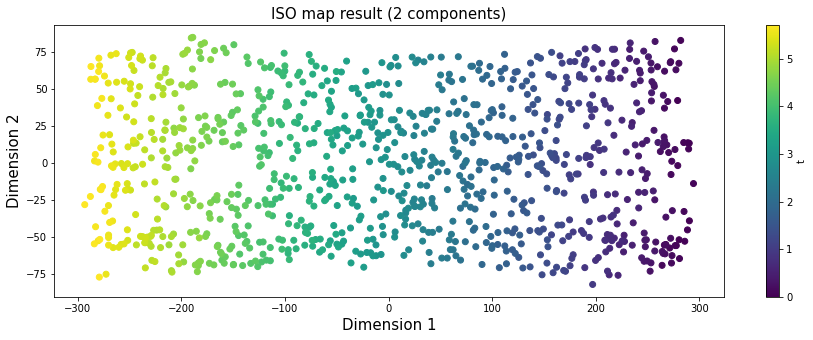

In [20]:
# Apply Isomap to reduce the data to two dimensions
iso = Isomap(n_components=2, n_neighbors=20)
embedding = iso.fit_transform(dataMatrix)

plt.figure(figsize=(15,5))
plt.scatter(embedding[:,0], embedding[:,1], c=t, cmap='viridis')
plt.colorbar(label='t')
plt.xlabel('Dimension 1',fontsize=15)
plt.ylabel('Dimension 2',fontsize=15)
plt.title('ISO map result (2 components)',fontsize=15)
plt.show()

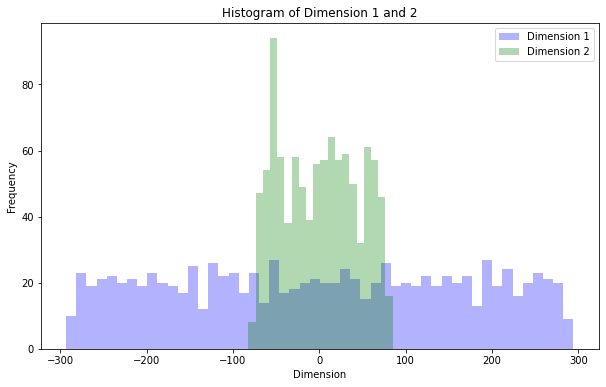

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='Dimension 1')
plt.hist(embedding[:, 1], bins=20, alpha=0.3, color='green', label='Dimension 2')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1 and 2')
plt.legend()
plt.show()

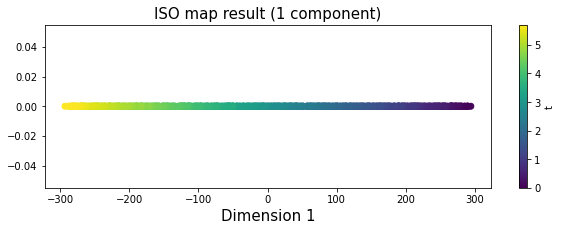

In [22]:
# Apply Isomap to reduce the data to two dimensions
iso = Isomap(n_components=1, n_neighbors=20)
embedding = iso.fit_transform(dataMatrix)

plt.figure(figsize=(10,3))
plt.scatter(embedding, np.zeros_like(embedding), c=t, cmap='viridis')
plt.colorbar(label='t')
plt.xlabel('Dimension 1',fontsize=15)
#plt.ylabel('Dimension 2',fontsize=15)
plt.title('ISO map result (1 component)',fontsize=15)
plt.show()

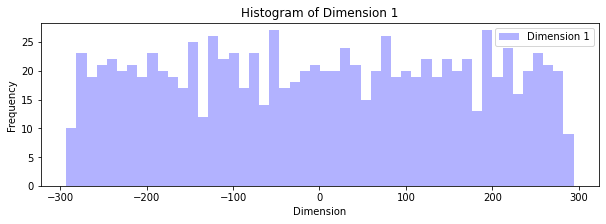

In [23]:
plt.figure(figsize=(10, 3))
plt.hist(embedding, bins=50, alpha=0.3, color='blue', label='Dimension 1')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1')
plt.legend()
plt.show()